In [109]:
import numpy as np
from matplotlib import cm
from scipy import stats
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

X = np.array([[4, 2.9], [2.5, 1], [3.5, 4], [2, 2.1]])

func = lambda xi, xj: np.linalg.norm(xi - xj) ** 2
matrix = [[func(xi, xj) for xi in X] for xj in X]

for row in matrix:
    print([round(x, 3) for x in row])
    

[0.0, 5.86, 1.46, 4.64]
[5.86, 0.0, 10.0, 1.46]
[1.46, 10.0, 0.0, 5.86]
[4.64, 1.46, 5.86, 0.0]


In [110]:
D = np.array([[8, -20], [0, -1], [10, -19], [10, -20], [2, 0]])
print('Mean:', np.mean(D, axis=0))

cov_m = np.cov(D, rowvar=False)
print('Cov:\n', cov_m)

Mean: [  6. -12.]
Cov:
 [[ 22.  -47.5]
 [-47.5 110.5]]


In [111]:
cov_m = np.cov(D, rowvar=False)
eigvals = np.linalg.eig(cov_m)[0]
eigvecs =  np.linalg.eig(cov_m)[1]
print('Eig vals:',eigvals)
print('Eig vecs:\n',eigvecs)

Eig vals: [  1.332 131.168]
Eig vecs:
 [[-0.917  0.399]
 [-0.399 -0.917]]


In [112]:
print('Size:', len(D), 'x',len(D[0]))


Size: 5 x 2


In [113]:
D_centered = D - np.mean(D, axis=0)
projection = -eigvecs[:, np.argmax(eigvals)]
print('First pc:\n', np.dot(D_centered, projection))

First pc:
 [-8.134 12.48  -8.015 -8.932 12.599]


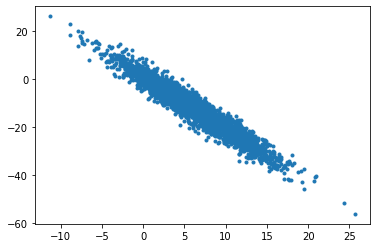

In [114]:
mean = np.mean(D, axis=0)
cov_m = np.cov(D, rowvar=False)

rv = np.random.multivariate_normal(mean, cov_m, 3000)
plt.plot(rv[:,0], rv[:,1], '.')

In [115]:
alpha, beta = 2, 5
tranform_m = np.array(matrix) * alpha + np.ones((len(X), len(X))) * beta
print(KernelPCA(1, 'precomputed').fit_transform(tranform_m@matrix@tranform_m))

[[ 10.254]
 [-10.254]
 [-10.254]
 [ 10.254]]


d:\documents\development\python projects\untitled5\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=precomputed as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
